In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load dataset
df = pd.read_csv('/content/cardio_train.csv', sep=';')

# Data Preprocessing
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [3]:
# Splitting features and target
X = df.drop(columns=['cardio'])  # Assuming 'cardio' is the target variable
y = df['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Deep Learning Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Hyperparameter Tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
gs = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='accuracy')
gs.fit(X_train, y_train)
print(f'Best Random Forest Params: {gs.best_params_}')


Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6300 - loss: 0.6435 - val_accuracy: 0.7236 - val_loss: 0.5696
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7145 - loss: 0.5847 - val_accuracy: 0.7327 - val_loss: 0.5561
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7240 - loss: 0.5654 - val_accuracy: 0.7326 - val_loss: 0.5506
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7239 - loss: 0.5600 - val_accuracy: 0.7362 - val_loss: 0.5510
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7253 - loss: 0.5574 - val_accuracy: 0.7381 - val_loss: 0.5472
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7308 - loss: 0.5526 - val_accuracy: 0.7377 - val_loss: 0.5468
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7277 - loss: 0.5513 - val_accuracy: 0.7376 - val_loss: 0.5447
Epoch 8/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7298 - loss: 0.5506 - 

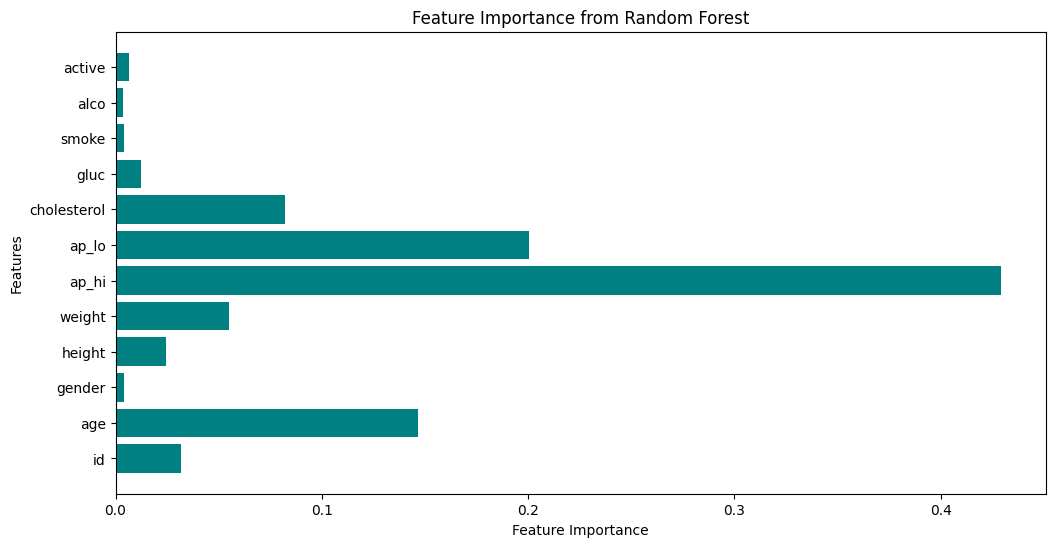

In [6]:
# Visualization: Feature Importance
rf_best = gs.best_estimator_
importances = rf_best.feature_importances_
plt.figure(figsize=(12, 6))
plt.barh(X.columns, importances, color='teal')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()

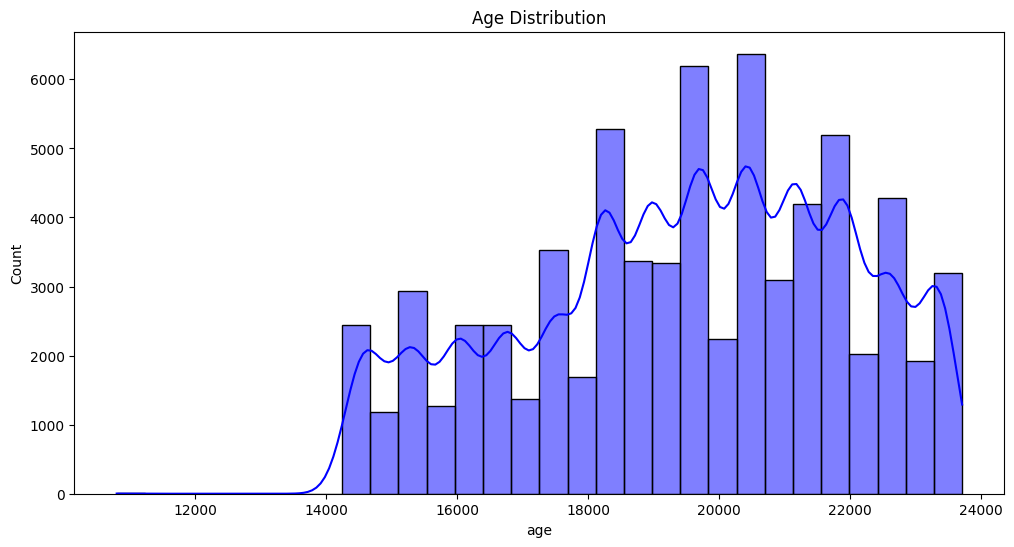

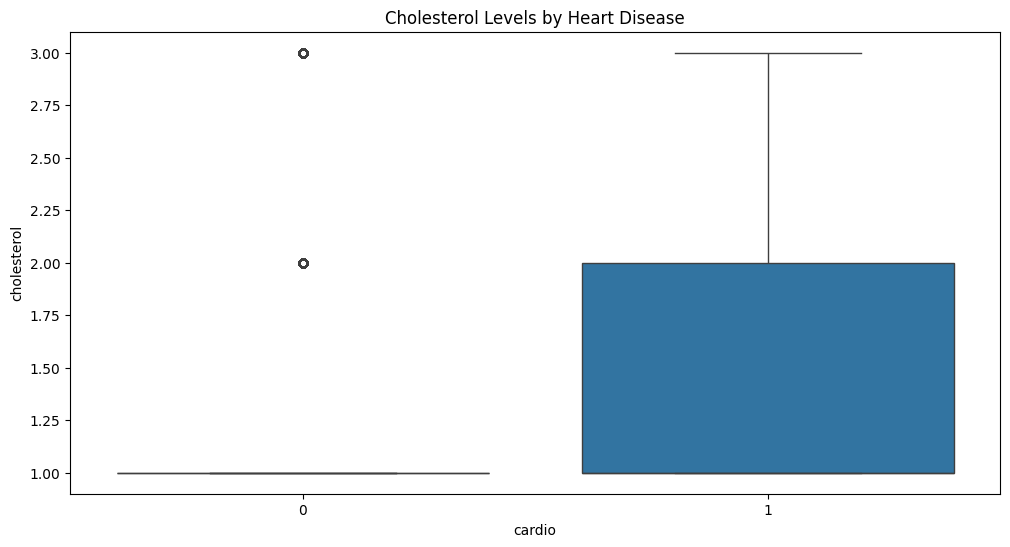

In [7]:
# Additional Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='cardio', y='cholesterol', data=df)
plt.title('Cholesterol Levels by Heart Disease')
plt.show()
